In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Para aumentar la resolución de los gráficos de Matplot
import matplotlib_inline  # .py
#matplotlib_inline.backend_inline.set_matplotlib_formats("retina")  # .py
rcParams['font.family'] = 'serif'
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 150
rcParams['axes.grid'] = True
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

##Datos del dia 1

In [3]:
V_prim = np.array(np.load('V_prim.npy',allow_pickle = True))
V_sec= np.array(np.load('V_sec.npy',allow_pickle = True))
V_R_pt= np.array(np.load("V_R_pt.npy",allow_pickle = True))

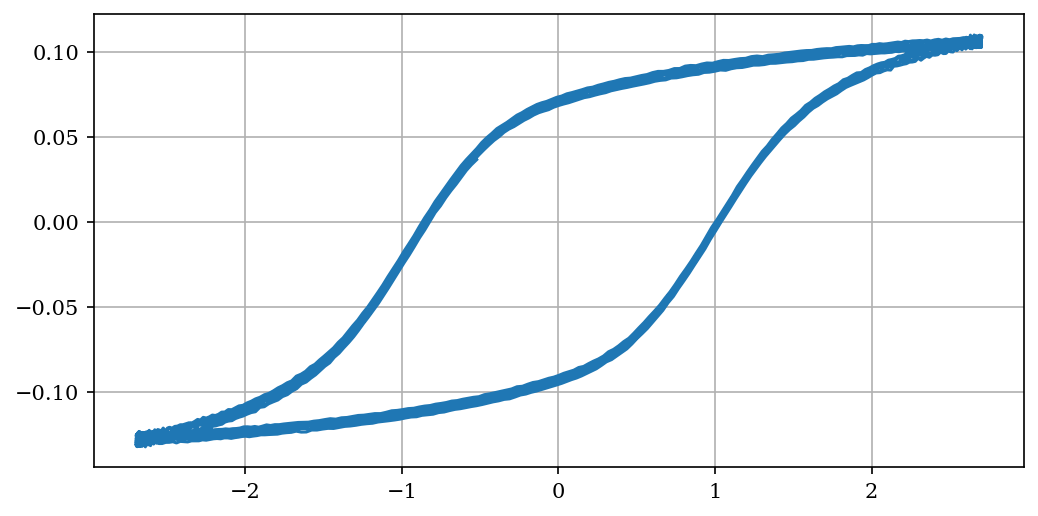

In [4]:
plt.plot(V_prim[0],V_sec[0])

In [5]:
#i = 0 
#while i < len(V_prim):
#  plt.figure()
#  plt.plot(V_prim[i],V_sec[i])
#  i = i + 1

In [6]:
#Definimos la funcion que relaciona la resistencia de platino a su temperatura
def Temp(R): #en Ohm
    data = np.loadtxt('Pt100_resistencia_temperatura.csv',delimiter=',') 
    temperature_vals = data[:,0] # en Celsius
    resistance_vals = data[:,1] #en Ohm
    return np.interp(R, resistance_vals, temperature_vals)+273 #Agregar si se quiere en kelvin

In [7]:
Resistencias = [] #Defino una lista para meter las resistencias
R_prom = 0
Corriente  = 495.4e-6
i = 0
while i < len(V_R_pt):
  for Voltaje in V_R_pt[i]:
    R_prom = R_prom + Voltaje/Corriente
  R_prom =R_prom/len(V_R_pt[i])  
  Resistencias.append(R_prom)
  i = i + 1
print(Resistencias)
print(len(Resistencias))

[21.183853590478982, 21.188537171373955, 21.19222505305678, 21.19618748166021, 21.21696276295535, 21.198278873929134, 21.201480307418002, 21.201373827819822, 21.225827376289995, 21.233134707850937, 21.218391925236027, 21.20890397416216, 21.2099151679201, 21.219478049905703, 21.220981464280595, 21.21695365874252, 21.233595741724837, 21.246327023706552, 21.262961483343222, 21.24007111278443, 21.265143951062434, 21.298616884419665, 21.314493690497606, 21.308795624295257, 21.341006157958258, 21.358366979071054, 21.368506179030156, 21.385266878220527, 21.392993605051643, 21.43142754441962, 21.457994128109785, 21.501291395443946, 21.55069681663517, 21.577665854700577, 21.633356951457568, 21.678979224365765, 21.730175660387566, 21.811030520531247, 21.86505919080563, 21.94184286539578, 22.034831903707712, 22.112118455404044, 22.20336810521562, 22.309094805205547, 22.37174674254616, 22.476355679722243, 22.632773970435288, 22.810934225462418, 23.000105436898114, 23.199624457290106, 23.4612099429

Text(0, 0.5, 'Temperatura')

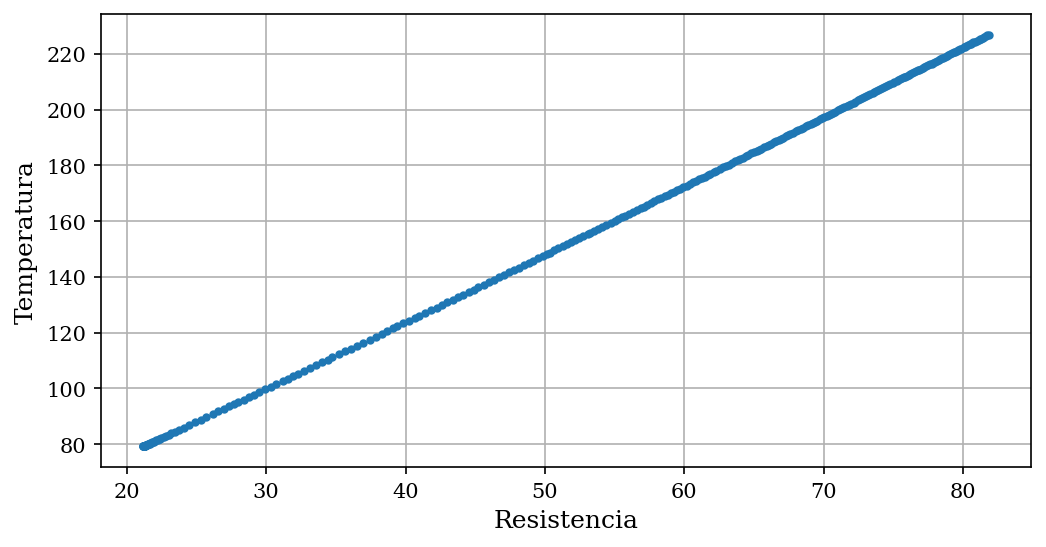

In [8]:
Temperaturas = Temp(Resistencias)
plt.plot(Resistencias, Temperaturas, ".")
plt.xlabel("Resistencia")
plt.ylabel("Temperatura")

300


Text(0, 0.5, 'Magnetización')

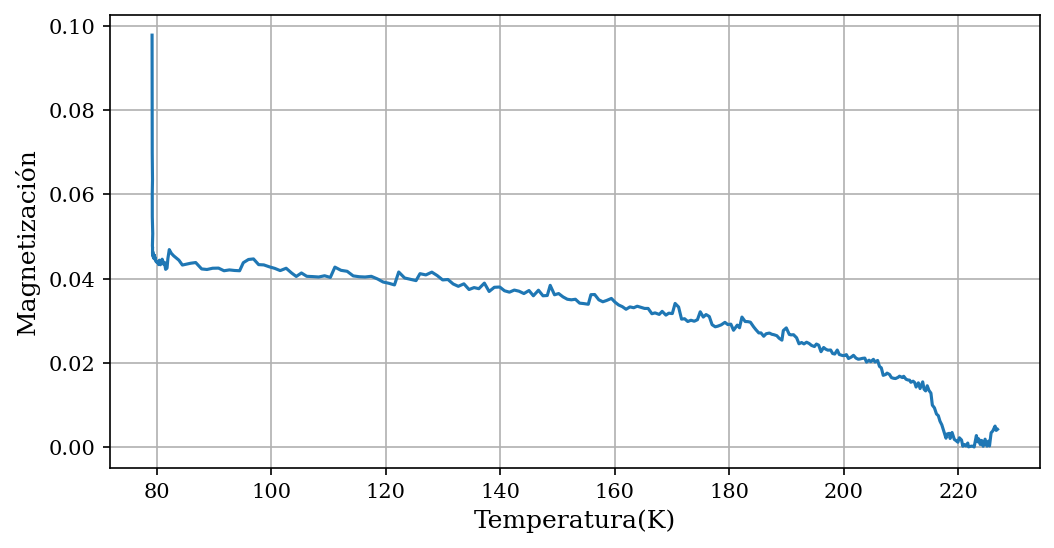

In [9]:
i = 0 
H = []
B = []
M= []
while i < len(V_prim):
  H.append(1 * (np.array(V_prim[i])/9994)) #modificar el 1 por la densidad de vueltas del trasnformador(primario))
  B.append(-np.array(V_sec[i])*1) #modificar el 1 por la densidad de vueltas del transformador (secundario))
  i=i+1
k=0
j=0
while j < len(H):
  while k < len(H[j]):
    if  -0.00001< (H[j])[k] < 0.000001 and (B[j])[k] >0:
      if len(M) <= j:
         M.append((B[j])[k])
    k=k+1
  j=j+1
  k=0

print(len(M))

plt.plot(Temperaturas,M,"-")
plt.xlabel("Temperatura(K)")
plt.ylabel("Magnetización")

In [10]:
np.save("Magnetizacion.npy",M)
np.save("Temperaturas.npy",Temperaturas)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
Magnetizacion = np.load("Magnetizacion.npy")
T = np.load("Temperaturas.npy")

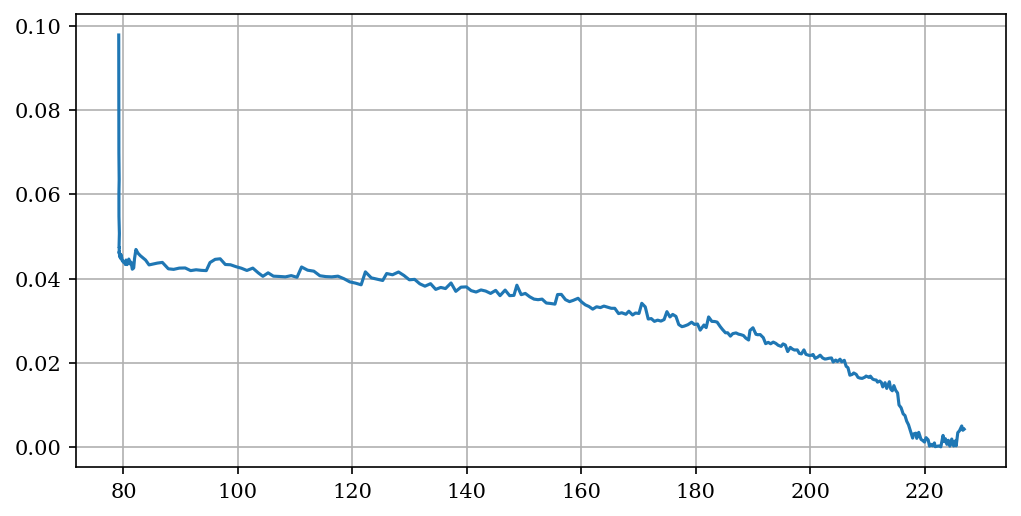

In [12]:
plt.plot(T,Magnetizacion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


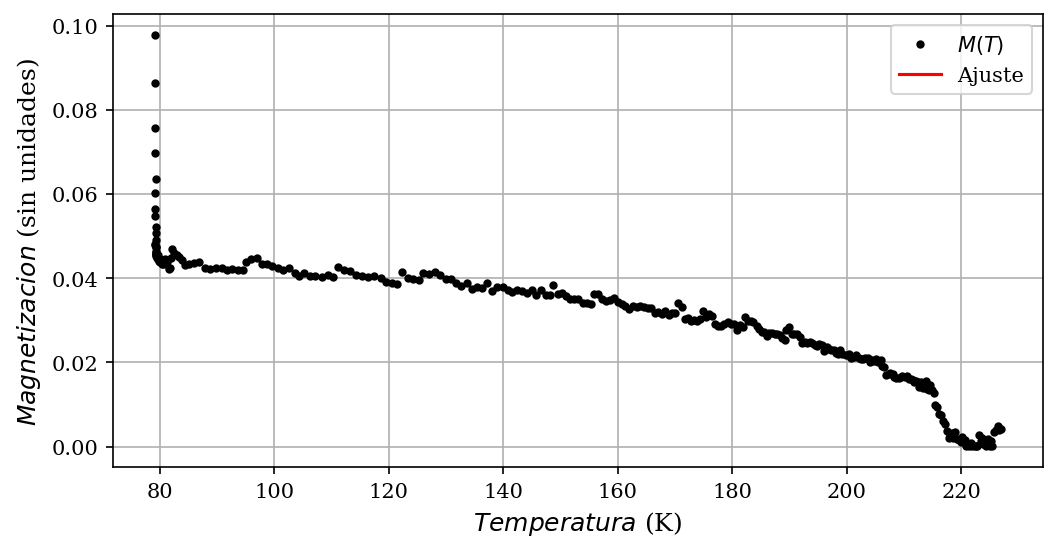

a: nan ± inf
b: nan ± inf
c: nan ± inf
c: nan ± inf


In [13]:
var_x = Temperaturas
var_y = M

plt.plot(var_x, var_y, '.', label='$M(T)$', color = 'k')

def f_ajuste(x,a,b,c,d):
    return a*(c-x)**b+d


popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b, c, d = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b, c, d)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Temperatura$ (K)')
plt.ylabel('$Magnetizacion$ (sin unidades)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b, err_c, err_d = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')
print(f'c: {c} ± {err_c}')
print(f'c: {d} ± {err_d}')

##Datos del dia 2

In [23]:
V_prim = np.array(np.load('V_prim1.npy',allow_pickle = True))
V_sec= np.array(np.load('V_sec1.npy',allow_pickle = True))
V_R_pt= np.array(np.load("V_R_pt1.npy",allow_pickle = True))

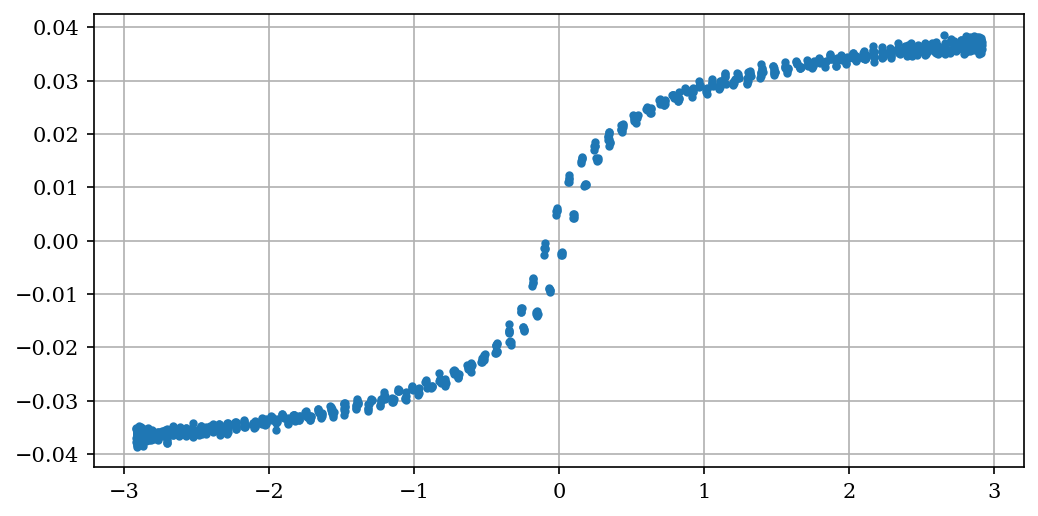

In [87]:
plt.plot(V_prim[430],-np.array(V_sec[430]),".")

In [88]:
Resistencias = [] #Defino una lista para meter las resistencias
R_prom = 0
Corriente  = 495.4e-6
i = 0
while i < len(V_R_pt)-200:
  for Voltaje in V_R_pt[i]:
    R_prom = R_prom + Voltaje/Corriente
  R_prom =R_prom/len(V_R_pt[i])  
  Resistencias.append(R_prom)
  i = i + 1
print(Resistencias)
print(len(Resistencias))
Temperaturas = Temp(Resistencias)
print(Temperaturas)

[19.581822838572855, 19.70830005250384, 19.65378024796232, 19.60369803844128, 19.657535325931573, 19.622055551822257, 19.755174490585894, 19.630104421817297, 19.753224808477462, 19.728858126600674, 19.676897138979257, 19.71227199577767, 19.677039548636927, 19.726376167827002, 19.700290082843583, 19.73426290203679, 19.68359855185742, 19.609322221608114, 19.69176734958999, 19.703611618842764, 19.597244087225242, 19.673989577353716, 19.665061129339136, 19.729456421075103, 19.666168209809214, 19.699475199227166, 19.692741126970297, 19.634960774314177, 19.772868011048544, 19.753812357666213, 19.685676301435716, 19.755516944883087, 19.691195111235714, 19.803755427347543, 19.795312046225884, 19.710057705242505, 19.7913597898754, 19.837664685754444, 19.79531563134107, 19.886380373628633, 19.863293505299406, 19.898645184958163, 19.881450047483966, 19.849435402216166, 19.86350236282704, 19.99977563469946, 19.887297507745323, 19.960025211250123, 19.978796899397988, 20.059551448124108, 20.09794541

In [89]:
#%%------------------Calculamos la magnetizacion remanente fachera-----------
i = 0 
H = []
B = []
while i < len(V_prim)-170:
  H.append(1 * (np.array(V_prim[i])/9994)) #modificar el 1 por la densidad de vueltas del trasnformador(primario))
  B.append(-(-np.array(V_sec[i]))*1) #modificar el 1 por la densidad de vueltas del transformador (secundario))
  i=i+1

#------------------Ahora interpolamos de manera grosa-------------------
#Conseguimos la magnetizacion negativa
i = 0
M_menos = []
while i < len(H):
  H_reducido = (H[i][:-1]>0) & (H[i][1:]<0)
  indice = np.where(H_reducido)[0]
  M_actual = 0
  j = 0
  while j < len(indice):
    pendiente = (B[i][indice[j]+1] - B[i][indice[j]]) / (H[i][indice[j]+1] - H[i][indice[j]])
    interpolacion = pendiente*(0-H[i][indice[j]])+B[i][indice[j]]
    M_actual = M_actual + interpolacion
    j = j + 1
  M_menos.append(M_actual/len(indice))
  i = i + 1
#Conseguimos la magnetizacion positiva
i = 0
M_mas = []
aver= []
while i < len(H):
  H_reducido = (H[i][:-1]<0) & (H[i][1:]>0)
  indice = np.where(H_reducido)[0]
  M_actual = 0
  f = len(M_mas)
  j = 0
  while j < len(indice):
    pendiente = (B[i][indice[j]+1] - B[i][indice[j]]) / (H[i][indice[j]+1] - H[i][indice[j]])
    interpolacion = pendiente*(0-H[i][indice[j]])+B[i][indice[j]]
    M_actual = M_actual + interpolacion
    j = j + 1
  M_mas.append(M_actual/len(indice))
  #if type(M_actual) == np.float64:
   # if M_actual <0:
    #  aver.append(i)
  i = i + 1

Chequeamos que sean 600 elementos

In [90]:
print(len(np.array(M_mas)[np.array(M_mas)>=0]))
len(M_mas)

430


430

In [91]:
print(len(np.array(M_menos)[np.array(M_menos)<0]))

430


600


ValueError: ignored

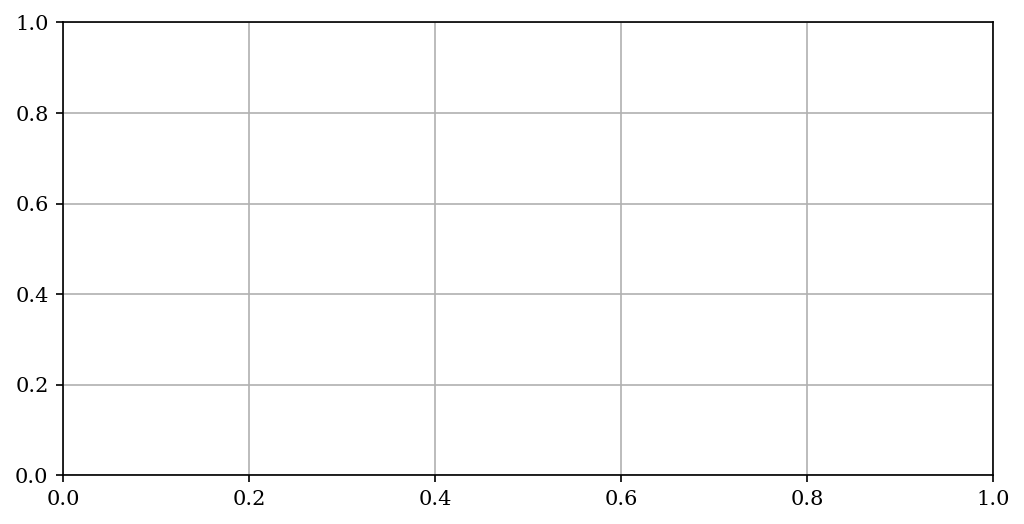

In [92]:
i = 0 
H = []
B = []
M= []
while i < len(V_prim):
  H.append(1 * (np.array(V_prim[i])/9994)) #modificar el 1 por la densidad de vueltas del trasnformador(primario))
  B.append(-np.array(V_sec[i])*1) #modificar el 1 por la densidad de vueltas del transformador (secundario))
  i=i+1
k=0
j=0
while j < len(H):
  while k < len(H[j]):
    if  -0.00001< (H[j])[k] < 0.000001 and (B[j])[k] >0:
      if len(M) <= j:
         M.append((B[j])[k])
    k=k+1
  j=j+1
  k=0

print(len(M))

plt.plot(Temperaturas,M,"-")
plt.xlabel("Temperatura(K)")
plt.ylabel("Magnetización")

In [ ]:
np.save("Magnetizacion.npy",M)
np.save("Temperaturas.npy",Temperaturas)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Magnetizacion = np.load("Magnetizacion.npy")
T = np.load("Temperaturas.npy")

In [ ]:
plt.plot(T,Magnetizacion)

In [ ]:
var_x = Temperaturas
var_y = M

plt.plot(var_x, var_y, '.', label='$M(T)$', color = 'k')

def f_ajuste(x,a,b,c,d):
    if x > c:
    return a*(c-x)**b+d


popt, pcov = curve_fit(f_ajuste, var_x, var_y)#, absolute_sigma = True, sigma=err_var_y)
a, b, c, d = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b, c, d)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel('$Temperatura$ (K)')
plt.ylabel('$Magnetizacion$ (sin unidades)')


# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b, err_c, err_d = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')
print(f'c: {c} ± {err_c}')
print(f'c: {d} ± {err_d}')